# ThulasiRam_RuppaKrishnan_HomeWork_1

# Introduction


This program  will read in the donors data from a .csv file.  This will be in a format that is structured with lines of data representing one type of unit (i.e. one donor in the donors file). Program will represent the data as Python dataframe data structure and perform exploration after cleaning the data.

This program will try to explore the answer for the following questions

1. What is the average gift amount across all the zipcode bucket and which zip code is likely to gift more than others
2. How the number of child and income affects the avg gift amount


# About the Data

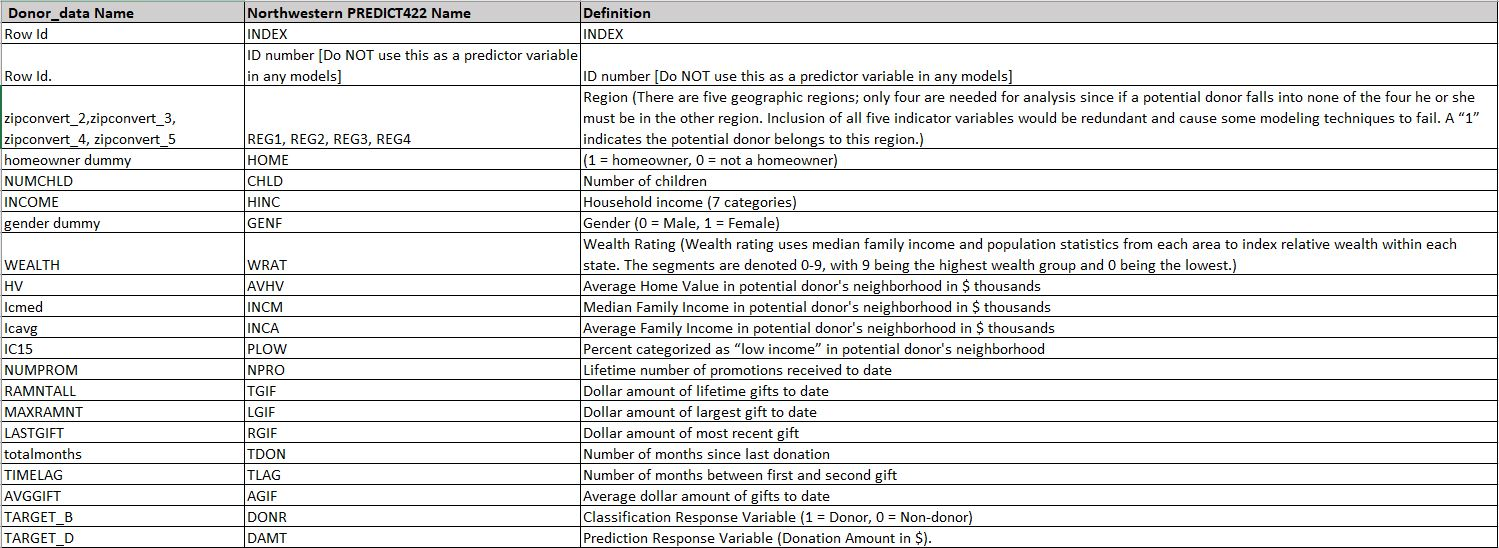

In [3]:
from IPython.display import Image
Image(filename='data_dict.jpg') 

# Program 

In [2]:
# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import re # regular expression for string operations
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

## Read donors data from a .csv file into a pandas dataframe

In [4]:
import csv
import pandas as pd

file_nm="donors_data.csv"

donor_dict={}
attribute_list=[]

with open(file_nm,'r') as in_file:
    file_reader= csv.reader(in_file,dialect="excel",delimiter=",")
    for idx,line in enumerate(file_reader):
        if idx==0:
            for attribute in line:
                attribute_list.append(attribute)
                donor_dict[attribute]=[]
        else:
            for ix,value in enumerate(line):
                donor_dict[attribute_list[ix]]=donor_dict[attribute_list[ix]]+[value]

in_file.close()

for attribute in attribute_list:
    print('Length of attribute {} list is {}'.format(attribute,len(donor_dict[attribute])))


donor_df=pd.DataFrame.from_dict(donor_dict)
donor_df.head()
                

Length of attribute Row Id list is 3120
Length of attribute Row Id. list is 3120
Length of attribute zipconvert_2 list is 3120
Length of attribute zipconvert_3 list is 3120
Length of attribute zipconvert_4 list is 3120
Length of attribute zipconvert_5 list is 3120
Length of attribute homeowner dummy list is 3120
Length of attribute NUMCHLD list is 3120
Length of attribute INCOME list is 3120
Length of attribute gender dummy list is 3120
Length of attribute WEALTH list is 3120
Length of attribute HV list is 3120
Length of attribute Icmed list is 3120
Length of attribute Icavg list is 3120
Length of attribute IC15 list is 3120
Length of attribute NUMPROM list is 3120
Length of attribute RAMNTALL list is 3120
Length of attribute MAXRAMNT list is 3120
Length of attribute LASTGIFT list is 3120
Length of attribute totalmonths list is 3120
Length of attribute TIMELAG list is 3120
Length of attribute AVGGIFT list is 3120
Length of attribute TARGET_B list is 3120
Length of attribute TARGET_D li

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1,5,1,...,1,74,102,6,5,29,3,4.857142857,1,5
1,2,25,1,0,0,0,1,1,1,0,...,4,46,94,12,12,34,6,9.4,1,10
2,3,29,0,0,0,1,0,2,5,1,...,13,32,30,10,5,29,7,4.285714286,1,5
3,4,38,0,0,0,1,1,1,3,0,...,4,94,177,10,8,30,3,7.08,0,0
4,5,40,0,1,0,0,1,1,4,0,...,7,20,23,11,11,30,6,7.666666667,0,0


### Check the data type of all columns in the dataframe

In [5]:
donor_df.iloc[:,:22].dtypes

Row Id             object
Row Id.            object
zipconvert_2       object
zipconvert_3       object
zipconvert_4       object
zipconvert_5       object
homeowner dummy    object
NUMCHLD            object
INCOME             object
gender dummy       object
WEALTH             object
HV                 object
Icmed              object
Icavg              object
IC15               object
NUMPROM            object
RAMNTALL           object
MAXRAMNT           object
LASTGIFT           object
totalmonths        object
TIMELAG            object
AVGGIFT            object
dtype: object

### Convert strings to integers and floats where it is applicable

In [6]:
donor_df.iloc[:,11:22].dtypes

for item in list(pd.DataFrame(donor_df.iloc[0,:]).index.values)[:-2]:
    try:
        donor_df[item]=donor_df[item].apply(int)
    except:
        donor_df[item]=donor_df[item].apply(float)
    
donor_df.iloc[:,:22].dtypes

Row Id               int64
Row Id.              int64
zipconvert_2         int64
zipconvert_3         int64
zipconvert_4         int64
zipconvert_5         int64
homeowner dummy      int64
NUMCHLD              int64
INCOME               int64
gender dummy         int64
WEALTH               int64
HV                   int64
Icmed                int64
Icavg                int64
IC15                 int64
NUMPROM              int64
RAMNTALL           float64
MAXRAMNT           float64
LASTGIFT           float64
totalmonths          int64
TIMELAG              int64
AVGGIFT            float64
dtype: object

## Exploratory Data Analysis

###  1. The below chart shows the distribution of home owners in the data which shows that there are more home owners who offered gift when compared to non home owners

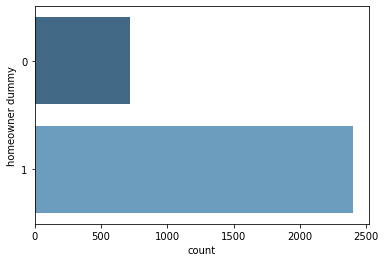

In [7]:
# countplot for HomeOwner
sns.countplot(y="homeowner dummy", data=donor_df, palette="Blues_d")
plt.show()

###  2. The below chart shows the distribution of number of childs in the data which shows that there are more 1 child parents who offered gift when compared to other number

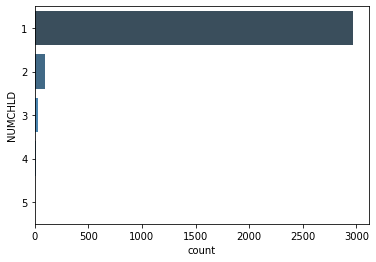

In [8]:
# countplot for NUMCHLD
sns.countplot(y="NUMCHLD", data=donor_df, palette="Blues_d")
plt.show()

###  3. The below chart shows the distribution of Income in the data is bell shaped and it is normally distributed

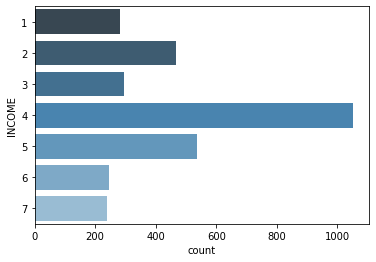

In [9]:
# countplot for INCOME
sns.countplot(y="INCOME", data=donor_df, palette="Blues_d")
plt.show()

###  4. The below chart shows that there are more female donors than male donors

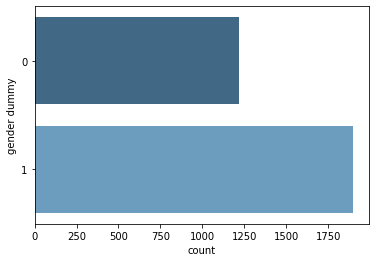

In [10]:
# countplot for gender dummy
sns.countplot(y="gender dummy", data=donor_df, palette="Blues_d")
plt.show()

### 5. This chart shows that the majority of the donors are from WEALTH category 8

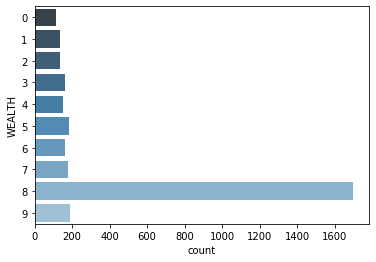

In [11]:
# countplot for WEALTH 
sns.countplot(y="WEALTH", data=donor_df, palette="Blues_d")
plt.show()

### 6. Distribution of Average Home value is as follows

Text(0.5, 1.0, 'HV')

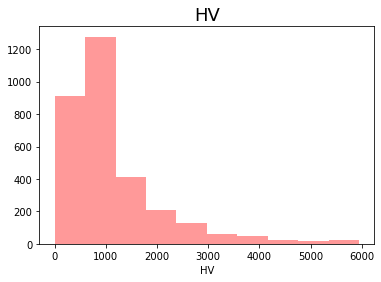

In [12]:
# countplot for HV  

sns.distplot(donor_df['HV'], kde=False, color='red', bins=10)
plt.title('HV', fontsize=18)
# plt.xlabel('Life Exp (years)', fontsize=16)
# plt.ylabel('Frequency', fontsize=16)

### 7. Distribution of Median Family income in donor's neighbourhood

Text(0.5, 1.0, 'Icmed')

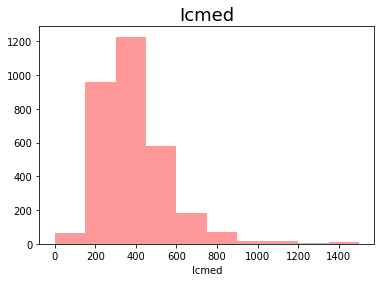

In [13]:
# countplot for Icmed  
sns.distplot(donor_df['Icmed'], kde=False, color='red', bins=10)
plt.title('Icmed', fontsize=18)

### 8. Average Family income in donor's neighbourhood

Text(0.5, 1.0, 'Icavg')

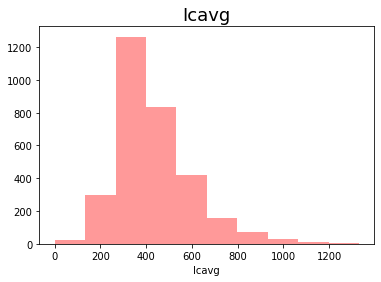

In [14]:
# countplot for Icmed  
sns.distplot(donor_df['Icavg'], kde=False, color='red', bins=10)
plt.title('Icavg', fontsize=18)

### 8. % low income in donor's neighbourhood

Text(0.5, 1.0, 'IC15')

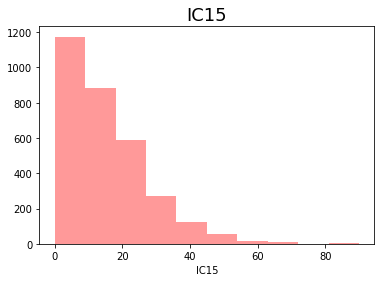

In [15]:
# countplot for IC15  
sns.distplot(donor_df['IC15'], kde=False, color='red', bins=10)
plt.title('IC15', fontsize=18)

### 9. Distribution on lifetime number of promotions

Text(0.5, 1.0, 'NUMPROM')

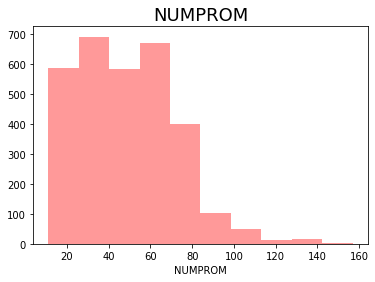

In [16]:
# countplot for NUMPROM   
sns.distplot(donor_df['NUMPROM'], kde=False, color='red', bins=10)
plt.title('NUMPROM', fontsize=18)

### 10. Distribution on Lifetime dollar amounts with a mean of $110 

In [17]:
donor_df['RAMNTALL'].describe()

count    3120.000000
mean      110.399875
std       147.299933
min        15.000000
25%        45.000000
50%        81.000000
75%       134.625000
max      5674.900000
Name: RAMNTALL, dtype: float64

Text(0.5, 1.0, 'RAMNTALL')

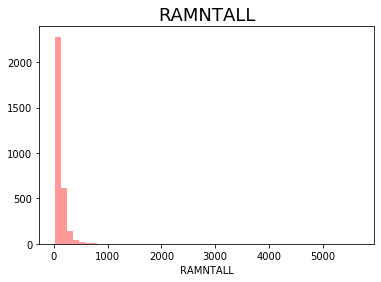

In [18]:
# countplot for RAMNTALL   
sns.distplot(donor_df['RAMNTALL'].astype(int), kde=False, color='red', bins=50)
plt.title('RAMNTALL', fontsize=18)

### 11. Distribution on Maximum dollar amounts with a mean of $16 

In [96]:
donor_df['MAXRAMNT'].describe()

count    3120.000000
mean       16.651397
std        22.223521
min         5.000000
25%        10.000000
50%        15.000000
75%        20.000000
max      1000.000000
Name: MAXRAMNT, dtype: float64

Text(0.5, 1.0, 'MAXRAMNT')

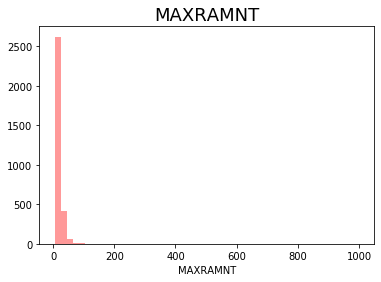

In [19]:
# countplot for MAXRAMNT   
sns.distplot(donor_df['MAXRAMNT'].astype(int), kde=False, color='red', bins=50)
plt.title('MAXRAMNT', fontsize=18)

### 12. Distribution on Latest dollar amounts with a mean of $13

In [97]:
donor_df['LASTGIFT'].describe()

count    3120.000000
mean       13.522917
std        10.581439
min         0.000000
25%         7.000000
50%        10.000000
75%        16.000000
max       219.000000
Name: LASTGIFT, dtype: float64

Text(0.5, 1.0, 'LASTGIFT')

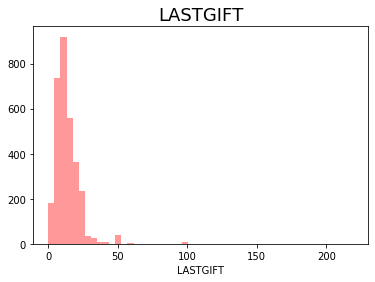

In [20]:
# countplot for LASTGIFT   

sns.distplot(donor_df['LASTGIFT'].astype(int), kde=False, color='red', bins=50)
plt.title('LASTGIFT', fontsize=18)

### 13. Count of Number of months since last donation exibits two different patterns. There are more donors who contributed last donation more than 28 months back in time that less than 28 months back in time

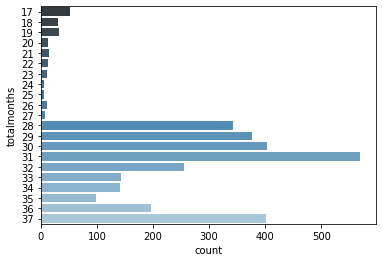

In [21]:
# countplot for totalmonths   
sns.countplot(y="totalmonths", data=donor_df, palette="Blues_d")
plt.show()

### 14. Timelag between first and second donation has a mean of 6

In [98]:
donor_df['TIMELAG'].describe()

count    3120.000000
mean        6.861859
std         5.561209
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        77.000000
Name: TIMELAG, dtype: float64

Text(0.5, 1.0, 'TIMELAG')

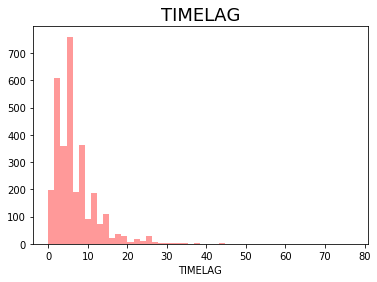

In [22]:
# countplot for TIMELAG   
sns.distplot(donor_df['TIMELAG'], kde=False, color='red', bins=50)
plt.title('TIMELAG', fontsize=18)

### 15. An average of $10 is donated by each donor 

In [99]:
donor_df['AVGGIFT'].describe()

count    3120.000000
mean       10.690713
std         7.443980
min         2.138889
25%         6.356092
50%         9.000000
75%        12.811652
max       122.166667
Name: AVGGIFT, dtype: float64

Text(0.5, 1.0, 'AVGGIFT')

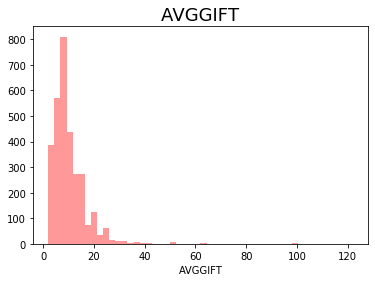

In [23]:
# countplot for AVGGIFT   
sns.distplot(donor_df['AVGGIFT'].astype(int), kde=False, color='red', bins=50)
plt.title('AVGGIFT', fontsize=18)

### Create bins for avg_gift, ic15 and time_lag for feature reduction

In [100]:
bins = [ 0,5, 10, 25, 50, 100]
labels = [1,2,3,4,5]
donor_df['avg_gift_binned'] = pd.cut(donor_df['AVGGIFT'], bins=bins, labels=labels)

bins = [ 0,5, 10, 25, 50, 75]
labels = [1,2,3,4,5]
donor_df['ic15_binned'] = pd.cut(donor_df['IC15'], bins=bins, labels=labels)

bins = [ 0,5, 10, 25, 50, 75]
labels = [1,2,3,4,5]
donor_df['time_lag_binned'] = pd.cut(donor_df['TIMELAG'], bins=bins, labels=labels)

### 16. Scatter plot on AVGGIFT and Income with Hue as WEALTH for Zipcode 2

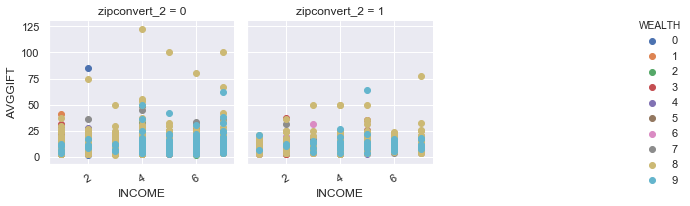

In [28]:
sns.set(style="darkgrid")
g = sns.FacetGrid(donor_df, col="zipconvert_2", col_wrap=3,hue="WEALTH")
g.map(plt.scatter, "INCOME", "AVGGIFT", alpha=1)
g.set_xticklabels(rotation=30)
g.add_legend();
plt.show()

### 17. Scatter plot on AVGGIFT and Income with Hue as WEALTH for Zipcode 3

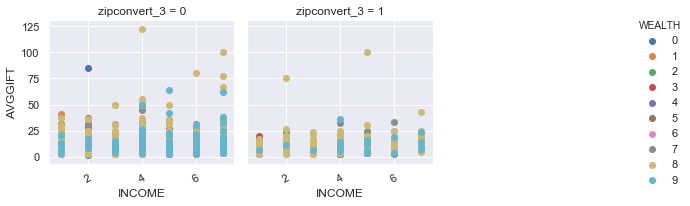

In [29]:
sns.set(style="darkgrid")
g = sns.FacetGrid(donor_df, col="zipconvert_3", col_wrap=3,hue="WEALTH")
g.map(plt.scatter, "INCOME", "AVGGIFT", alpha=1)
g.set_xticklabels(rotation=30)
g.add_legend();
plt.show()

### 18. Scatter plot on AVGGIFT and Income with Hue as WEALTH for Zipcode 4

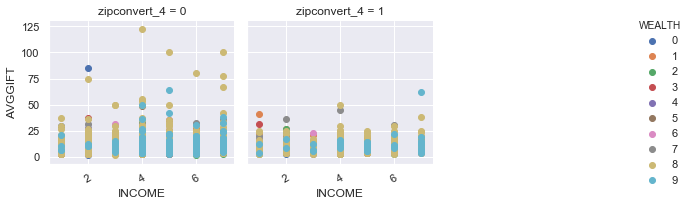

In [30]:
sns.set(style="darkgrid")
g = sns.FacetGrid(donor_df, col="zipconvert_4", col_wrap=3,hue="WEALTH")
g.map(plt.scatter, "INCOME", "AVGGIFT", alpha=1)
g.set_xticklabels(rotation=30)
g.add_legend();
plt.show()

### 19. Scatter plot on AVGGIFT and Income with Hue as WEALTH for Zipcode 5

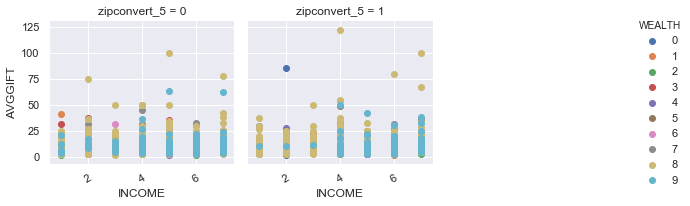

In [31]:
sns.set(style="darkgrid")
g = sns.FacetGrid(donor_df, col="zipconvert_5", col_wrap=3,hue="WEALTH")
g.map(plt.scatter, "INCOME", "AVGGIFT", alpha=1)
g.set_xticklabels(rotation=30)
g.add_legend();
plt.show()

### 20. Scatter plot on AVGGIFT and Income with Hue as Home Owner for both the Genders

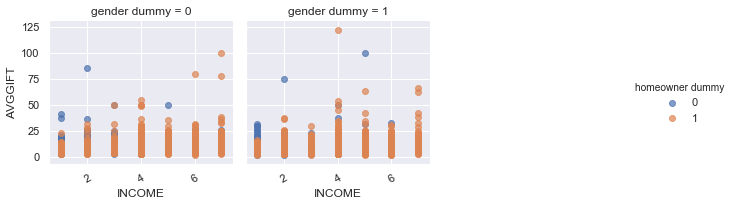

In [32]:
sns.set(style="darkgrid")
g = sns.FacetGrid(donor_df, col="gender dummy", col_wrap=3,hue="homeowner dummy")
g.map(plt.scatter, "INCOME", "AVGGIFT", alpha=.7)
g.set_xticklabels(rotation=30)
g.add_legend();
plt.show()

### 21. Scatter plot on AVGGIFT and Income with Hue as Gender for all total months

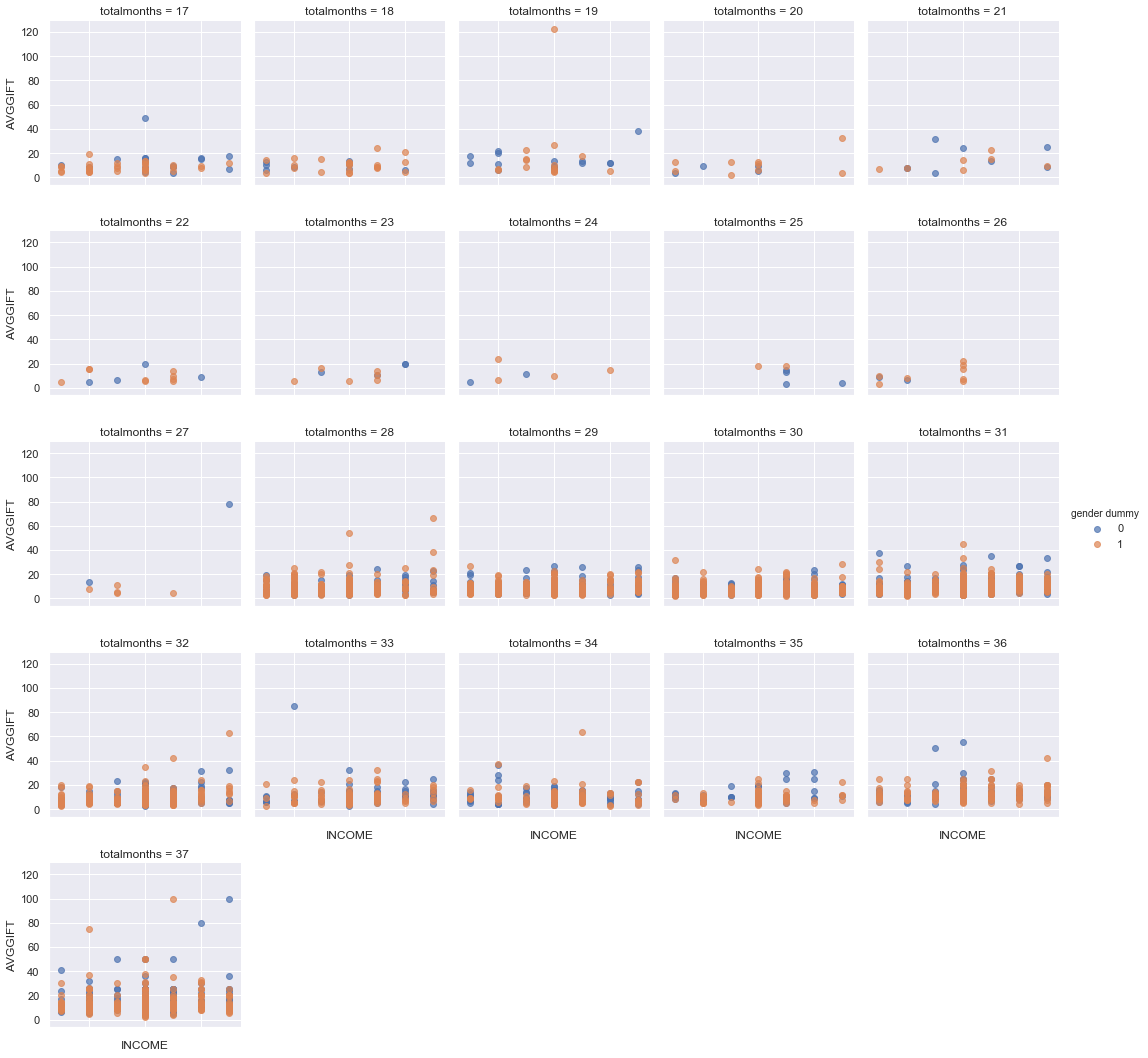

In [33]:
sns.set(style="darkgrid")
g = sns.FacetGrid(donor_df, col="totalmonths", col_wrap=5,hue="gender dummy")
g.map(plt.scatter, "INCOME", "AVGGIFT", alpha=.7)
g.set_xticklabels(rotation=30)
g.add_legend();
plt.show()

### 22. Scatter plot on AVGGIFT and Income with Hue as Home Owner for Number of children

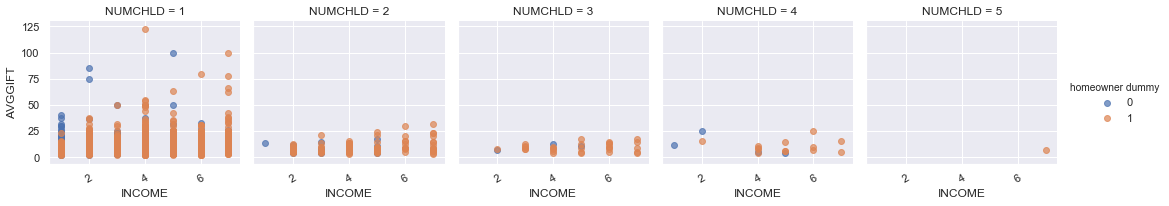

In [34]:
sns.set(style="darkgrid")
g = sns.FacetGrid(donor_df, col="NUMCHLD", col_wrap=5,hue="homeowner dummy")
g.map(plt.scatter, "INCOME", "AVGGIFT", alpha=.7)
g.set_xticklabels(rotation=30)
g.add_legend();
plt.show()

### 23. Scatter plot on AVGGIFT and Income with Hue as low income neighbourhood bins for all time lag bins

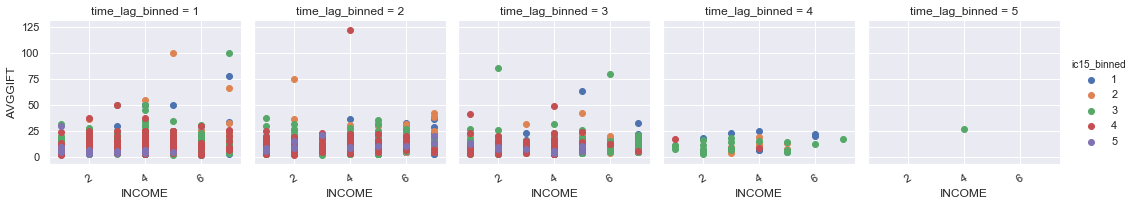

In [35]:
sns.set(style="darkgrid")
g = sns.FacetGrid(donor_df, col="time_lag_binned", col_wrap=5,hue="ic15_binned")
g.map(plt.scatter, "INCOME","AVGGIFT", alpha=1)
g.set_xticklabels(rotation=30)
g.add_legend();
plt.show()

In [36]:
donor_df.head()

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D,avg_gift_binned,ic15_binned,time_lag_binned
0,1,17,0,1,0,0,1,1,5,1,...,6.0,5.0,29,3,4.857143,1,5,1,1,1
1,2,25,1,0,0,0,1,1,1,0,...,12.0,12.0,34,6,9.400000,1,10,2,1,2
2,3,29,0,0,0,1,0,2,5,1,...,10.0,5.0,29,7,4.285714,1,5,1,3,2
3,4,38,0,0,0,1,1,1,3,0,...,10.0,8.0,30,3,7.080000,0,0,2,1,1
4,5,40,0,1,0,0,1,1,4,0,...,11.0,11.0,30,6,7.666667,0,0,2,2,2


In [92]:
def dummy_to_col(zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5):
    if zipconvert_2==1:
        return 2
    elif zipconvert_3==1:
        return 3
    elif zipconvert_4==1:
        return 4
    elif zipconvert_5==1:
        return 5
    else:
        return 1
        
donor_df_z=donor_df.copy()
#donor_df_z["zip"]=donor_df_z['zipconvert_2']+donor_df_z['zipconvert_3']+donor_df_z['zipconvert_4']+donor_df_z['zipconvert_5']
donor_df_z["zip"]=donor_df_z.apply(lambda x: dummy_to_col(x['zipconvert_2'],x['zipconvert_3'],x['zipconvert_4'],x['zipconvert_5']),axis=1)

## Question 1: What is the average gift amount across all the zipcode bucket and which zip code is likely to gift more than others
#### Based on the below finding mean avergage doesnt exhibit substantial difference in the value but the total is high for zipcode 5 and very low for zipcode 1

In [114]:
df_zip=pd.concat([donor_df_z.loc[:,['zip','AVGGIFT']].groupby('zip').mean(),donor_df_z.loc[:,['zip','AVGGIFT']].groupby('zip').sum()],axis=1).reset_index()
df_zip.columns=['zip','Mean Avg Gift','Total Avg Gift']
df_zip

,zip,Mean Avg Gift,Total Avg Gift
0,1,8.380556,33.522222
1,2,10.605263,7094.921006
2,3,9.726735,5622.052909
3,4,10.295576,6887.740155
4,5,11.430658,13716.789341


## Question 2: How the number of child and income affects the avg gift amount

###    Here the dataset shows that as Income increases the average gift and total gift inceases whereas when the numer of children increases the average gift and the total gift decreases


In [123]:
df_child=pd.concat([donor_df_z.loc[:,['NUMCHLD','INCOME','AVGGIFT']].groupby(['NUMCHLD','INCOME']).mean(),donor_df_z.loc[:,['NUMCHLD','INCOME','AVGGIFT']].groupby(['NUMCHLD','INCOME']).sum()],axis=1)
df_child.columns=['Mean Avg Gift','Total Avg Gift']
df_child

Mean Avg Gift  Total Avg Gift
NUMCHLD INCOME                               
1       1            9.486678     2656.269899
        2            9.882527     4437.254473
        3            9.892211     2750.034535
        4           10.598185    10863.139785
        5           11.081236     5540.617896
        6           12.150940     2746.112448
        7           13.494235     2887.766286
2       1           13.500000       13.500000
        2            7.661279      114.919188
        3            8.956262      116.431411
        4            8.944126      152.050147
        5            9.508538      237.713447
        6           13.375556      133.755556
        7           12.001796      216.032333
3       2            7.357143       14.714286
        3            9.943333       49.716667
        4            8.298237       49.789423
        5            9.970106       59.820635
        6           10.763666       75.345661
        7            9.918788       49.593939
4       1           11.500000       11.500000
        2           20.333333       40.666667
        4            7.256667       36.283333
        5            8.053571       32.214286
        6           14.083333       42.250000
        7           10.466667       20.933333
5       7            6.600000        6.600000